In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
def Kd_to_deltaG(Kd):
    if Kd > 0:
        deltaG = (math.log10(Kd)*(1.98*298.15))/1000
        return deltaG
    else:
        deltaG = 0
        return deltaG

In [3]:
def Kd_2_dG(Kd):
    deltaG = np.log(Kd)*(8.314/4184)*(298.15)
    
    return deltaG

In [4]:
df = pd.read_csv("../data/skempi_v2.csv",sep=";",engine='python')

In [5]:
df['Affinity_mut (M)'] = df['Affinity_mut (M)'].str.replace(',','.')
df['Affinity_mut (M)'] = df['Affinity_mut (M)'].str.replace('>','')
df['Affinity_mut (M)'] = df['Affinity_mut (M)'].str.replace('n.b','0')
df['Affinity_mut (M)'] = df['Affinity_mut (M)'].str.replace('<','')
df['Affinity_mut (M)'] = df['Affinity_mut (M)'].str.replace('~','')

df = df.loc[-(df['Affinity_mut (M)'] == 'unf')]
df['Affinity_mut (M)'] = df['Affinity_mut (M)'].astype(float)

In [6]:
df['Affinity_wt (M)'] = df['Affinity_wt (M)'].str.replace(',','.')
df['Affinity_wt (M)']= df['Affinity_wt (M)'].str.replace('>','')
df['Affinity_wt (M)'] = df['Affinity_wt (M)'].str.replace('n.b','0')
df['Affinity_wt (M)']= df['Affinity_wt (M)'].str.replace('<','')
df['Affinity_wt (M)']= df['Affinity_wt (M)'].str.replace('~','')

df = df.loc[-(df['Affinity_wt (M)'] == 'unf')]
df['Affinity_wt (M)'] = df['Affinity_wt (M)'].astype(float)

In [7]:
df['ddG'] = df['Affinity_mut (M)'].apply(Kd_2_dG) - df['Affinity_wt (M)'].apply(Kd_2_dG)

In [8]:
df2 = df.loc[-(df["Affinity_mut (M)"] == 0.0)]

In [9]:
df2.loc[df2['Mutation(s)_PDB'].str.split(',').str.len()==1]

,#Pdb,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),Affinity_mut_parsed,Affinity_wt (M),Affinity_wt_parsed,...,koff_wt (s^(-1)),koff_wt_parsed,dH_mut (kcal mol^(-1)),dH_wt (kcal mol^(-1)),dS_mut (cal mol^(-1) K^(-1)),dS_wt (cal mol^(-1) K^(-1)),Notes,Method,SKEMPI version,ddG
0,1CSE_E_I,LI45G,LI38G,COR,Pr/PI,Pr/PI,5.260000e-11,5.26E-11,1.120000e-12,1.12E-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,2.280577
1,1CSE_E_I,LI45S,LI38S,COR,Pr/PI,Pr/PI,8.330000e-12,8.33E-12,1.120000e-12,1.12E-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,1.188776
2,1CSE_E_I,LI45P,LI38P,COR,Pr/PI,Pr/PI,1.020000e-07,1.02E-07,1.120000e-12,1.12E-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,6.765446
3,1CSE_E_I,LI45I,LI38I,COR,Pr/PI,Pr/PI,1.720000e-10,1.72E-10,1.120000e-12,1.12E-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,2.982502
4,1CSE_E_I,LI45D,LI38D,COR,Pr/PI,Pr/PI,1.920000e-09,1.92E-09,1.120000e-12,1.12E-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,4.411843
5,1CSE_E_I,LI45E,LI38E,COR,Pr/PI,Pr/PI,6.250000e-11,6.25E-11,1.120000e-12,1.12E-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,2.382746
6,1ACB_E_I,LI45G,LI38G,COR,Pr/PI,Pr/PI,4.550000e-08,4.55E-08,1.490000e-12,1.49E-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,6.118069
7,1ACB_E_I,LI45S,LI38S,COR,Pr/PI,Pr/PI,7.140000e-09,7.14E-09,1.490000e-12,1.49E-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,5.020848
8,1ACB_E_I,LI45P,LI38P,COR,Pr/PI,Pr/PI,1.850000e-07,1.85E-07,1.490000e-12,1.49E-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,6.949068
9,1ACB_E_I,LI45I,LI38I,COR,Pr/PI,Pr/PI,2.080000e-09,2.08E-09,1.490000e-12,1.49E-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,4.290150


In [10]:
df2.loc[(df2.ddG.abs() > 6)]

,#Pdb,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),Affinity_mut_parsed,Affinity_wt (M),Affinity_wt_parsed,...,koff_wt (s^(-1)),koff_wt_parsed,dH_mut (kcal mol^(-1)),dH_wt (kcal mol^(-1)),dS_mut (cal mol^(-1) K^(-1)),dS_wt (cal mol^(-1) K^(-1)),Notes,Method,SKEMPI version,ddG
2,1CSE_E_I,LI45P,LI38P,COR,Pr/PI,Pr/PI,1.020000e-07,1.02E-07,1.120000e-12,1.12E-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,6.765446
6,1ACB_E_I,LI45G,LI38G,COR,Pr/PI,Pr/PI,4.550000e-08,4.55E-08,1.490000e-12,1.49E-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,6.118069
8,1ACB_E_I,LI45P,LI38P,COR,Pr/PI,Pr/PI,1.850000e-07,1.85E-07,1.490000e-12,1.49E-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,6.949068
10,1ACB_E_I,LI45D,LI38D,COR,Pr/PI,Pr/PI,1.610000e-07,1.61E-07,1.490000e-12,1.49E-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,6.866746
11,1ACB_E_I,LI45E,LI38E,COR,Pr/PI,Pr/PI,1.110000e-07,1.11E-07,1.490000e-12,1.49E-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,6.646428
108,1BRS_A_D,HA102A,HA100A,COR,NaN,"1BRS_A_D,1B2U_A_D,1B2S_A_D,1B3S_A_D,1X1W_A_D,1...",3.200000e-10,3.2E-10,1.000000e-14,"1,00E-14",...,3.73E-06,3.73E-06,-10.9,-19.3,6.71,-1.01,"Thermodynamic data from 9126847.,,",ITC,1,6.145795
113,1BRS_A_D,DD39A,DD39A,COR,NaN,"1BRS_A_D,1B2U_A_D,1B2S_A_D,1B3S_A_D,1X1W_A_D,1...",4.060000e-09,4.06E-09,1.000000e-14,"1,00E-14",...,3.73E-06,3.73E-06,-7.4,-19.3,13.1,-1.01,Thermodynamic data from 9126847. ITC dG(mut) i...,ITC,1,7.650989
118,1BRS_A_D,"KA27A,YD29A","KA25A,YD29A","COR,RIM",NaN,"1BRS_A_D,1B2U_A_D,1B2S_A_D,1B3S_A_D,1X1W_A_D,1...",2.100000e-08,2.1E-08,1.000000e-14,"1,00E-14",...,3.73E-06,3.73E-06,NaN,NaN,NaN,NaN,NaN,SFFL,1,8.624589
119,1BRS_A_D,"KA27A,DD35A","KA25A,DD35A","COR,COR",NaN,"1BRS_A_D,1B2U_A_D,1B2S_A_D,1B3S_A_D,1X1W_A_D,1...",1.000000e-07,"1,00E-07",1.000000e-14,"1,00E-14",...,3.73E-06,3.73E-06,NaN,NaN,NaN,NaN,NaN,SFFL,1,9.549198
121,1BRS_A_D,"KA27A,DD39A","KA25A,DD39A","COR,COR",NaN,"1BRS_A_D,1B2U_A_D,1B2S_A_D,1B3S_A_D,1X1W_A_D,1...",1.170000e-08,1.17E-08,1.000000e-14,"1,00E-14",...,3.73E-06,3.73E-06,-10.6,-19.3,0.671,-1.01,Thermodynamic data from 9126847. ITC dG(mut) i...,ITC,1,8.278044


In [11]:
df['Hold_out_type'].unique()

array(['Pr/PI', nan, 'AB/AG', 'AB/AG,Pr/PI', 'TCR/pMHC'], dtype=object)

In [12]:
ab_data = df.loc[(df['Hold_out_type'] == 'AB/AG,Pr/PI') | (df['Hold_out_type'] == 'AB/AG')]

In [13]:
ab_data_singleMut = ab_data.loc[ab_data['Mutation(s)_PDB'].str.split(',').str.len()==1]

In [14]:
#ab_data_singleMut.to_csv('../data/skempi_ABlike_singleMut.csv')
ab_data_singleMut.shape

(830, 30)

In [15]:
ab_data_singleMut_filtered = ab_data_singleMut.loc[-(ab_data_singleMut["Affinity_mut (M)"] == 0.0)]

In [16]:
ab_data_singleMut_filtered.loc[(ab_data_singleMut_filtered.ddG.abs() > 6)]

,#Pdb,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),Affinity_mut_parsed,Affinity_wt (M),Affinity_wt_parsed,...,koff_wt (s^(-1)),koff_wt_parsed,dH_mut (kcal mol^(-1)),dH_wt (kcal mol^(-1)),dS_mut (cal mol^(-1) K^(-1)),dS_wt (cal mol^(-1) K^(-1)),Notes,Method,SKEMPI version,ddG
573,2JEL_LH_P,TP34N,TP34N,COR,AB/AG,AB/AG,3.000000e-04,"3,00E-04",3.000000e-09,"3,00E-09",...,NaN,NaN,NaN,NaN,NaN,NaN,"Unusual method,,",CSPRIA,2,6.820856
1133,3BN9_B_CD,DB96A,DB91A,COR,"AB/AG,Pr/PI","AB/AG,Pr/PI",1.000000e-06,"1,00E-06",1.230000e-11,1.23E-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FL,2,6.698210
1134,3BN9_B_CD,FB97A,FB92A,COR,"AB/AG,Pr/PI","AB/AG,Pr/PI",1.000000e-06,"1,00E-06",1.230000e-11,1.23E-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FL,2,6.698210
1195,1DQJ_AB_C,KC96A,KC96A,SUP,AB/AG,AB/AG,9.090000e-05,9.09E-05,2.780000e-09,2.78E-09,...,NaN,NaN,NaN,NaN,NaN,NaN,"NB) HyHEL-10 and HyHEL-63 are very similar,,",SPR,1,6.158576
1206,1DQJ_AB_C,YB50A,YB50A,SUP,AB/AG,AB/AG,3.130000e-04,3.13E-04,2.780000e-09,2.78E-09,...,NaN,NaN,NaN,NaN,NaN,NaN,"NB) HyHEL-10 and HyHEL-63 are very similar,,",SPR,1,6.891110
2149,3HFM_HL_Y,KY96A,KY96A,SUP,AB/AG,AB/AG,4.000000e-06,"4,00E-06",3.000000e-11,"3,00E-11",...,NaN,NaN,NaN,NaN,NaN,NaN,"NB) HyHEL-10 and HyHEL-63 are very similar,,",SP,1,6.991293
2165,3HFM_HL_Y,KY97A,KY97A,COR,AB/AG,AB/AG,1.000000e-06,"1,00E-06",3.000000e-11,"3,00E-11",...,NaN,NaN,NaN,NaN,NaN,NaN,"NB) HyHEL-10 and HyHEL-63 are very similar,,",SP,1,6.169981
2166,3HFM_HL_Y,YH33A,YH33A,COR,AB/AG,AB/AG,8.000000e-07,"8,00E-07",3.000000e-11,"3,00E-11",...,NaN,NaN,NaN,NaN,NaN,NaN,"NB) HyHEL-10 and HyHEL-63 are very similar,,",SP,1,6.037779
2187,3HFM_HL_Y,YH50A,YH50A,SUP,AB/AG,AB/AG,7.000000e-06,"7,00E-06",3.000000e-11,"3,00E-11",...,NaN,NaN,NaN,NaN,NaN,NaN,"NB) HyHEL-10 and HyHEL-63 are very similar,,",SP,1,7.322839
2235,3HFM_HL_Y,KY97G,KY97G,COR,AB/AG,AB/AG,3.900000e-06,3.9E-06,7.500000e-11,7.5E-11,...,NaN,NaN,NaN,NaN,NaN,NaN,"NB) HyHEL-10 and HyHEL-63 are very similar,,",IASP,1,6.433435


In [17]:
ab_data_singleMut_filtered["pdb_mutation"] = ab_data_singleMut_filtered["#Pdb"]+"_"+ab_data_singleMut_filtered["Mutation(s)_cleaned"]

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
ab_data_singleMut_filtered.drop_duplicates(subset='pdb_mutation',inplace=True)

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
ab_data_singleMut_filtered.loc[ab_data_singleMut_filtered['#Pdb'].str.startswith('3SE8')]

,#Pdb,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),Affinity_mut_parsed,Affinity_wt (M),Affinity_wt_parsed,...,koff_wt_parsed,dH_mut (kcal mol^(-1)),dH_wt (kcal mol^(-1)),dS_mut (cal mol^(-1) K^(-1)),dS_wt (cal mol^(-1) K^(-1)),Notes,Method,SKEMPI version,ddG,pdb_mutation
6722,3SE8_HL_G,RH30A,RH30A,COR,AB/AG,AB/AG,5.900000e-08,5.9E-08,6.300000e-08,6.3E-08,...,NaN,NaN,NaN,NaN,NaN,NaN,SPR,2,-0.038863,3SE8_HL_G_RH30A
6723,3SE8_HL_G,WH47A,WH47A,SUP,AB/AG,AB/AG,7.300000e-07,7.3E-07,6.300000e-08,6.3E-08,...,NaN,NaN,NaN,NaN,NaN,NaN,SPR,2,1.451454,3SE8_HL_G_WH47A
6724,3SE8_HL_G,WH50A,WH50A,SUP,AB/AG,AB/AG,5.770000e-07,5.77E-07,6.300000e-08,6.3E-08,...,NaN,NaN,NaN,NaN,NaN,NaN,SPR,2,1.312108,3SE8_HL_G_WH50A
6725,3SE8_HL_G,KH52A,KH52A,COR,AB/AG,AB/AG,3.990000e-07,3.99E-07,6.300000e-08,6.3E-08,...,NaN,NaN,NaN,NaN,NaN,NaN,SPR,2,1.093564,3SE8_HL_G_KH52A
6726,3SE8_HL_G,LH53A,LH54A,COR,AB/AG,AB/AG,6.900000e-08,6.9E-08,6.300000e-08,6.3E-08,...,NaN,NaN,NaN,NaN,NaN,NaN,SPR,2,0.053896,3SE8_HL_G_LH54A
6727,3SE8_HL_G,WH54A,WH55A,COR,AB/AG,AB/AG,2.230000e-07,2.23E-07,6.300000e-08,6.3E-08,...,NaN,NaN,NaN,NaN,NaN,NaN,SPR,2,0.748881,3SE8_HL_G_WH55A
6728,3SE8_HL_G,GH55A,GH56A,SUP,AB/AG,AB/AG,1.140000e-07,1.14E-07,6.300000e-08,6.3E-08,...,NaN,NaN,NaN,NaN,NaN,NaN,SPR,2,0.351362,3SE8_HL_G_GH56A
6729,3SE8_HL_G,VH57A,VH58A,COR,AB/AG,AB/AG,5.020000e-07,5.02E-07,6.300000e-08,6.3E-08,...,NaN,NaN,NaN,NaN,NaN,NaN,SPR,2,1.229614,3SE8_HL_G_VH58A
6730,3SE8_HL_G,SH58A,SH59A,COR,AB/AG,AB/AG,4.260000e-07,4.26E-07,6.300000e-08,6.3E-08,...,NaN,NaN,NaN,NaN,NaN,NaN,SPR,2,1.132356,3SE8_HL_G_SH59A
6731,3SE8_HL_G,YH59A,YH60A,SUP,AB/AG,AB/AG,2.610000e-07,2.61E-07,6.300000e-08,6.3E-08,...,NaN,NaN,NaN,NaN,NaN,NaN,SPR,2,0.842103,3SE8_HL_G_YH60A


In [28]:
ab_data_singleMut_filtered.to_csv('../data/skempi_ABlike_singleMut.Final.csv')

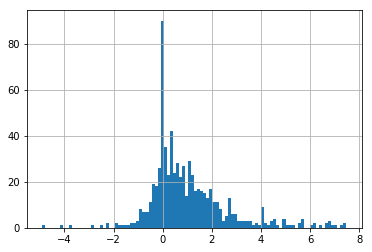

In [27]:
ab_data_singleMut_filtered["ddG"].hist(bins=100)

In [16]:
nt = ab_data_singleMut_filtered["Notes"]
nt.isna().value_counts()

True     497
False    199
Name: Notes, dtype: int64

In [24]:
pdbs = ab_data_singleMut_filtered["#Pdb"].unique()
pdbs.sort()

In [26]:
pdbs.shape

(50,)

# check distributions

/home/vilion/miniconda3/envs/bio/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


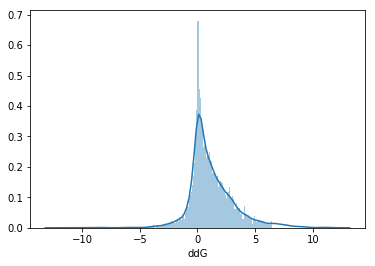

In [25]:
g = sns.distplot(df['ddG'],bins=np.arange(-5,6.6,0.1))
#g.set_xlim(0)

In [42]:
stats.kstest(df['ddG'], "f", stats.f.fit(df['ddG']))

KstestResult(statistic=0.6015200903274733, pvalue=0.0)

In [35]:
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
# Load data and select first column

In [36]:
df_final = pd.read_csv("../data/DF_train15_skempiAB_modeller_final.csv",index_col=0)


In [37]:
y = df_final.ddG_exp.values
size = len(y) 

In [38]:
sc=StandardScaler() 
yy = y.reshape (-1,1)
sc.fit(yy)
y_std =sc.transform(yy)
y_std = y_std.flatten()
y_std
del yy

In [39]:
# Set up list of candidate distributions to use
# See https://docs.scipy.org/doc/scipy/reference/stats.html for more

dist_names = ['beta',
              'johnsonsu',
              'gamma',
              'lognorm',
              'genlogistic',
              'pearson3',
              'triang',
              'uniform',
              'genextreme', 
              'weibull_max',
                'f',
              'gilbrat',
             't',
            'nct',
             'logistic',
             'gumbel_r',
             'dgamma']

# Set up empty lists to stroe results
chi_square = []
p_values = []

# Set up 50 bins for chi-square test
# Observed data will be approximately evenly distrubuted aross all bins
percentile_bins = np.linspace(0,100,51)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions

for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    
    # Obtain the KS test P statistic, round it to 5 decimal places
    p = scipy.stats.kstest(y_std, distribution, args=param)[1]
    p = np.around(p, 5)
    p_values.append(p)    
    
    # Get expected counts in percentile bins
    # This is based on a 'cumulative distrubution function' (cdf)
    cdf_fitted = dist.cdf(percentile_cutoffs, *param[:-2], loc=param[-2], 
                          scale=param[-1])
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)
    
    # calculate chi-squared
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square.append(ss)
        
# Collate results and sort by goodness of fit (best at top)

results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square
results['p_value'] = p_values
results.sort_values(['chi_square'], inplace=True)
    
# Report results

print ('\nDistributions sorted by goodness of fit:')
print ('----------------------------------------')
print (results)

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1680: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution     chi_square  p_value
1     johnsonsu     104.207123  0.00763
13          nct     126.849814  0.00301
12            t     126.852156  0.00301
16       dgamma     156.908588  0.02284
4   genlogistic     355.410753  0.00000
14     logistic     362.930934  0.00000
2         gamma     889.291003  0.00000
0          beta     889.749458  0.00000
3       lognorm     892.296653  0.00000
9   weibull_max    1290.208058  0.00000
8    genextreme    1290.239138  0.00000
15     gumbel_r    2484.110600  0.00000
6        triang    4662.818844  0.00000
7       uniform   12838.922560  0.00000
11      gilbrat   15058.222574  0.00000
10            f   65303.714152  0.00000
5      pearson3  142631.728223  0.00000
